In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import multiprocessing as mul
from scipy import stats
import pickle
from scipy.integrate import quad
from corner import corner
import pandas as pd
from scipy.stats import gaussian_kde
import dynesty as dyn

In [2]:
GRBs = ['GRB210619B', 'GRB210610B', 'GRB210204A', 'GRB201216C', 'GRB200829A', 'GRB200613A', 'GRB190114C', 'GRB180720B', 'GRB180703A', 'GRB171010A', 'GRB160625B', 'GRB160509A', 'GRB150821A', 'GRB150514A', 'GRB150403A', 'GRB150314A', 'GRB141028A', 'GRB140508A', 'GRB140206A', 'GRB131231A', 'GRB131108A', 'GRB130925A', 'GRB130518A','GRB130427A', 'GRB120119A', 'GRB100728A', 'GRB091003A', 'GRB090926A', 'GRB090618', 'GRB090328', 'GRB081221', 'GRB080916C']

In [3]:
arr = [i.replace('_results.txt', '') for i in os.listdir('./outputs/BF_xerr/') if i.endswith('.txt')]

In [4]:
arr.sort( reverse=True)
GRBs.sort(reverse=True)

In [5]:
for i in range(len(GRBs)):
    if GRBs[i] not in arr:
        print(GRBs[i])

In [6]:
all_BE = {}
for file in [i for i in os.listdir('./outputs/BF_xerr/') if i.endswith('.txt')]:
    be = []
    with open('./outputs/BF_xerr/'+file, 'rb') as f:
        data = np.loadtxt(f, delimiter=',')
        # be = np.exp(data[:,0] - data[:,0][0])
        be = data[:,0] - data[:,0][0]
        # print(be)
    f.close()
    all_BE[file.replace('_results.txt', '')] = be
    # with open('./outputs/BE/'+file, 'wb') as f:
    #     np.savetxt(f, be, delimiter=',')
        
    f.close()

In [7]:
all_BE_df = pd.DataFrame(all_BE).T

In [8]:
all_BE_df

,0,1,2
GRB081221,0.0,-1.252118,-0.710745
GRB120119A,0.0,-1.499981,-0.548577
GRB210204A,0.0,-3.511314,-5.104656
GRB200613A,0.0,-1.383623,-0.568158
GRB171010A,0.0,-1.713994,-0.793470
GRB130925A,0.0,-1.662770,0.011654
GRB180720B,0.0,-1.067632,-0.583329
GRB131231A,0.0,-3.432571,-1.001320
GRB131108A,0.0,-1.512216,-0.819380
GRB150514A,0.0,-1.070321,-0.493601


In [9]:
all_BE_df.sort_index(inplace=True, ascending=False)

In [10]:
all_BE_df

,0,1,2
GRB210619B,0.0,-1.239645,-0.549442
GRB210610B,0.0,-1.704595,-1.169382
GRB210204A,0.0,-3.511314,-5.104656
GRB201216C,0.0,-0.972529,-0.211351
GRB200829A,0.0,-3.345368,-4.000532
GRB200613A,0.0,-1.383623,-0.568158
GRB190114C,0.0,-2.184709,-0.503592
GRB180720B,0.0,-1.067632,-0.583329
GRB180703A,0.0,-1.575199,-0.557881
GRB171010A,0.0,-1.713994,-0.793470


In [11]:
all_BE_df[all_BE_df[1] > 4.6]

,0,1,2
GRB160625B,0.0,8.759599,63.99874


In [12]:
all_BE_df[all_BE_df[2] > 4.6]

,0,1,2
GRB160625B,0.0,8.759599,63.99874


In [11]:
grbparam = pd.read_csv(os.getcwd() + '/../data/GRBPARAM.csv', index_col=0).T

In [12]:
grbparam.sort_index(inplace=True, ascending=False)

In [13]:
grbparam

GRB,E0,Emax,redshift
GRB210619B,10.0,11000.0,1.9370
GRB210610B,30.0,380.0,1.1300
GRB210204A,10.0,400.0,0.8760
GRB201216C,15.0,700.0,1.1000
GRB200829A,25.0,3500.0,1.2500
GRB200613A,30.0,300.0,1.2200
GRB190114C,10.0,5000.0,0.4250
GRB180720B,25.0,17000.0,0.6540
GRB180703A,20.0,400.0,0.6678
GRB171010A,10.0,620.0,0.3285


In [14]:
new_df = pd.concat([grbparam, all_BE_df], axis=1)

In [15]:
new_df.drop(['Emax'], axis=1, inplace=True)

In [16]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-1.239645,-0.549442
GRB210610B,30.0,1.1300,0.0,-1.704595,-1.169382
GRB210204A,10.0,0.8760,0.0,-3.511314,-5.104656
GRB201216C,15.0,1.1000,0.0,-0.972529,-0.211351
GRB200829A,25.0,1.2500,0.0,-3.345368,-4.000532
GRB200613A,30.0,1.2200,0.0,-1.383623,-0.568158
GRB190114C,10.0,0.4250,0.0,-2.184709,-0.503592
GRB180720B,25.0,0.6540,0.0,-1.067632,-0.583329
GRB180703A,20.0,0.6678,0.0,-1.575199,-0.557881
GRB171010A,10.0,0.3285,0.0,-1.713994,-0.793470


In [17]:
new_df.sort_index(inplace=True, ascending=False)

In [18]:
new_df

,E0,redshift,0,1,2
GRB210619B,10.0,1.9370,0.0,-1.239645,-0.549442
GRB210610B,30.0,1.1300,0.0,-1.704595,-1.169382
GRB210204A,10.0,0.8760,0.0,-3.511314,-5.104656
GRB201216C,15.0,1.1000,0.0,-0.972529,-0.211351
GRB200829A,25.0,1.2500,0.0,-3.345368,-4.000532
GRB200613A,30.0,1.2200,0.0,-1.383623,-0.568158
GRB190114C,10.0,0.4250,0.0,-2.184709,-0.503592
GRB180720B,25.0,0.6540,0.0,-1.067632,-0.583329
GRB180703A,20.0,0.6678,0.0,-1.575199,-0.557881
GRB171010A,10.0,0.3285,0.0,-1.713994,-0.793470


In [19]:
data = []
for i in [i for i in os.listdir('./outputs/GOF_xerr/') if i.endswith('.txt')]: # os.listdir('./outputs/GOF_xerr/'):
    # with open('./outputs/GOF/' + i, 'rb') as f:
    #     data.append(np.load(f))
    if i.endswith('_GOF.txt'):
        data.append([i.replace('_GOF.txt', ''), *np.loadtxt('./outputs/GOF_xerr/' + i)])
df2 = pd.DataFrame(data, columns=['GRB', 'Null', 'Linear', 'Quadratic'])
df2.index = df2['GRB']
df2.drop('GRB', axis=1, inplace=True)
df2.sort_index(inplace=True, ascending=False)

In [20]:
i

'GRB180720B_GOF.txt'

In [21]:
final = pd.concat([new_df, df2], axis=1)

In [22]:
final

,E0,redshift,0,1,2,Null,Linear,Quadratic
GRB210619B,10.0,1.9370,0.0,-1.239645,-0.549442,3.298502,2.470697,2.139541
GRB210610B,30.0,1.1300,0.0,-1.704595,-1.169382,1.123765,1.005285,0.645402
GRB210204A,10.0,0.8760,0.0,-3.511314,-5.104656,5.296247,5.923794,6.431211
GRB201216C,15.0,1.1000,0.0,-0.972529,-0.211351,1.086473,1.097306,1.050494
GRB200829A,25.0,1.2500,0.0,-3.345368,-4.000532,1.946803,1.909213,2.186005
GRB200613A,30.0,1.2200,0.0,-1.383623,-0.568158,1.126710,1.566556,0.914387
GRB190114C,10.0,0.4250,0.0,-2.184709,-0.503592,3.462510,3.522001,3.862939
GRB180720B,25.0,0.6540,0.0,-1.067632,-0.583329,0.998023,1.293713,1.175411
GRB180703A,20.0,0.6678,0.0,-1.575199,-0.557881,9.087989,10.059962,10.189686
GRB171010A,10.0,0.3285,0.0,-1.713994,-0.793470,0.434765,0.517034,0.601931


In [23]:
final = final[['E0', 'redshift', 0, 'Null', 1, 'Linear', 2, 'Quadratic']]

In [24]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,3.298502,-1.239645,2.470697,-0.549442,2.139541
GRB210610B,30.0,1.1300,0.0,1.123765,-1.704595,1.005285,-1.169382,0.645402
GRB210204A,10.0,0.8760,0.0,5.296247,-3.511314,5.923794,-5.104656,6.431211
GRB201216C,15.0,1.1000,0.0,1.086473,-0.972529,1.097306,-0.211351,1.050494
GRB200829A,25.0,1.2500,0.0,1.946803,-3.345368,1.909213,-4.000532,2.186005
GRB200613A,30.0,1.2200,0.0,1.126710,-1.383623,1.566556,-0.568158,0.914387
GRB190114C,10.0,0.4250,0.0,3.462510,-2.184709,3.522001,-0.503592,3.862939
GRB180720B,25.0,0.6540,0.0,0.998023,-1.067632,1.293713,-0.583329,1.175411
GRB180703A,20.0,0.6678,0.0,9.087989,-1.575199,10.059962,-0.557881,10.189686
GRB171010A,10.0,0.3285,0.0,0.434765,-1.713994,0.517034,-0.793470,0.601931


In [25]:
final['Null'] = final['Null'].round(2)
final['Linear'] = final['Linear'].round(2)
final['Quadratic'] = final['Quadratic'].round(2)
final[1] = final[1].round(2)
final[2] = final[2].round(2)

In [26]:
final

,E0,redshift,0,Null,1,Linear,2,Quadratic
GRB210619B,10.0,1.9370,0.0,3.30,-1.24,2.47,-0.55,2.14
GRB210610B,30.0,1.1300,0.0,1.12,-1.70,1.01,-1.17,0.65
GRB210204A,10.0,0.8760,0.0,5.30,-3.51,5.92,-5.10,6.43
GRB201216C,15.0,1.1000,0.0,1.09,-0.97,1.10,-0.21,1.05
GRB200829A,25.0,1.2500,0.0,1.95,-3.35,1.91,-4.00,2.19
GRB200613A,30.0,1.2200,0.0,1.13,-1.38,1.57,-0.57,0.91
GRB190114C,10.0,0.4250,0.0,3.46,-2.18,3.52,-0.50,3.86
GRB180720B,25.0,0.6540,0.0,1.00,-1.07,1.29,-0.58,1.18
GRB180703A,20.0,0.6678,0.0,9.09,-1.58,10.06,-0.56,10.19
GRB171010A,10.0,0.3285,0.0,0.43,-1.71,0.52,-0.79,0.60


In [27]:
final.to_latex("./outputs/table_xerr.tex", float_format="%.2f")#, columns=['GRB', 'E0 (keV)', 'Redshift', 'Null $\ln(BF)$', 'Null_$\chi^2_{\\nu}$', 'Null + Lin LIV $\ln(BF)$', 'Null+ Lin LIV\_$\chi^2_{\\nu}$', 'Null +Quad LIV $\ln(BF)$', 'Null+Quad LIV\_$\chi^2_{\\nu}$'])

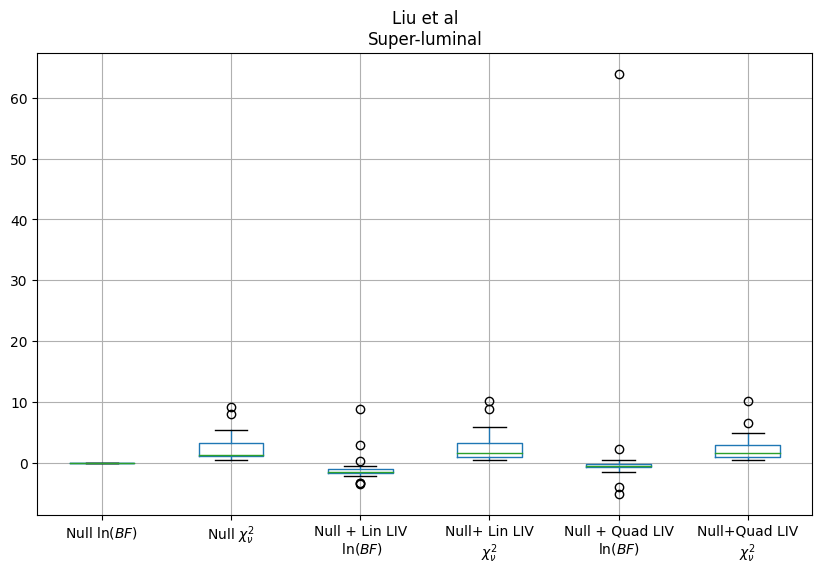

In [28]:
plt.figure(figsize=(10, 6))
temp= final.drop(['E0', 'redshift'], inplace=False, axis=1)
temp.columns = ['Null $\ln(BF)$', 'Null $\chi^2_{\\nu}$', 'Null + Lin LIV\n $\ln(BF)$', 'Null+ Lin LIV\n$\chi^2_{\\nu}$', 'Null + Quad LIV\n$\ln(BF)$', 'Null+Quad LIV\n$\chi^2_{\\nu}$']

temp.boxplot()
# plt.yticks
plt.title('Liu et al\nSuper-luminal')
# plt.ylim(-20, 20)
plt.show()